In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

2

[50. 50.]


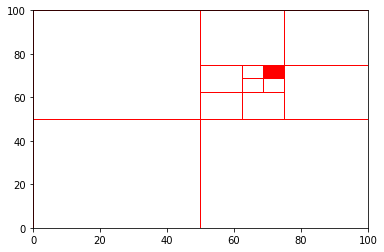

In [82]:
#general idea:
# there is a world, which has size and number of voxels for N dimensions
# every voxel can be subdivided by into 2 by every dimension
# when voxel is subdivided, the subdivided voxels are his children
# world can return a voxel given position
# it will return a smallest available voxel child within the area


class Voxel:
    def __init__(self,world,pos,size,int_pos,parent=None):
        self.world = world
        self.parent = parent
        self.pos=pos
        self.size=size
        self.int_pos = tuple(pos)
        self.subvoxels = np.zeros([2 for i in range(len(self.world.size))]).astype(object)
        self.contents = []
        self.is_divided = False
        self.color = "none"
        
    def subdivide(self):
        self.is_divided = True
        v_size = self.size / 2
        for index, x in np.ndenumerate(self.subvoxels):
            v_int_pos = tuple(index)
            v_pos = (np.array(index) * v_size) + self.pos
            self.subvoxels[tuple(index)]=Voxel(self.world,v_pos,v_size,v_int_pos,self) 
         
    def get_subvoxel(self,pos):
        if self.is_divided:
            #print("debug",pos,self.pos,self.size,np.floor((pos - self.pos) / (self.size / 2) ).astype(int))
            int_pos = tuple(np.floor((pos - self.pos) / (self.size / 2)).astype(int))
            return self.subvoxels[int_pos]
        else:
            return self
        
    def __repr__(self):
        return str(self.pos)
    
    def _draw(self,ax):
        #print('adding patch',tuple(self.pos),self.size[0],self.size[1])
        rect = patches.Rectangle(tuple(self.pos),self.size[0],self.size[1],
                                 linewidth=1,edgecolor='r',facecolor=self.color)
        ax.add_patch(rect)
        if self.is_divided:
            for index, x in np.ndenumerate(self.subvoxels):
                self.subvoxels[tuple(index)]._draw(ax)

class VoxelWorld:
    #size = n element array, where n is a number of dimensions, and size[i] = size of world in i'th dimension
    #base_voxel_num = n element array, where n is a number of dimensions, 
    ##and base_voxel_num[i] = number of base voxels in i'th dimension
    def __init__(self,size,base_voxel_num):
        self.size = np.array(size)
        self.base_voxel_num =np.array(base_voxel_num)
        self.base_voxel_size = self.size / self.base_voxel_num
        self.world = np.zeros(self.base_voxel_num.astype(int)).astype(object)
        
        for index, x in np.ndenumerate(self.world):
            v_size = self.base_voxel_size
            v_int_pos = tuple(index)
            v_pos = np.array(index) * v_size
            self.world[tuple(index)]=Voxel(self,v_pos,v_size,v_int_pos) 

    def get_voxel_from_pos(self,pos):
        int_pos = tuple(np.floor(pos / self.base_voxel_size).astype(int))
        voxel = self.world[int_pos]
        while voxel.is_divided:
            voxel = voxel.get_subvoxel(pos)
        return voxel
    
    def plot(self):
        if len(self.size == 2):
            plt.figure()
            ax = plt.gca()
            ax.set_xlim([0,self.size[0]])
            ax.set_ylim([0,self.size[1]])
            #ax.add_patch(patches.Rectangle((0.1, 0.1), 0.2, 0.2, fill=None, alpha=1))
            for index, x in np.ndenumerate(self.world):
                self.world[tuple(index)]._draw(ax)
            ax.scatter((70.2),(70.3))    
            plt.show()    
        else:
            print("Cannot draw when dimension number != 2")
          
vw = VoxelWorld((100.0,100.0),(1,1))    
vw.get_voxel_from_pos((70.2,70.3)).subdivide()
vw.get_voxel_from_pos((70.2,70.3)).subdivide()
vw.get_voxel_from_pos((70.2,70.3)).subdivide()
vw.get_voxel_from_pos((70.2,70.3)).subdivide()
vw.get_voxel_from_pos((70.2,70.3)).color = 'red'
print(vw.get_voxel_from_pos((60.2,60.3)).pos)
vw.plot()

#someX, someY = 0.5, 0.5
#plt.figure()
#currentAxis = plt.gca()
#currentAxis.add_patch(patches.Rectangle((someX - .1, someY - .1), 0.2, 0.2, fill=None, alpha=1))
#plt.show()